# Sunday Crashes around Viva Streets

Is there a reduction in crashes around Viva Streets on Sundays? Look for crashes in the vicinity compared to the city as a whole. 

Viva Streets closures:

* Broadway from Alameda north
* Continues up Welton
* Ends at Downing

In [1]:
import json
import pytz
import folium
from folium.features import DivIcon
from folium.plugins import HeatMap

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib._color_data import TABLEAU_COLORS

import os
os.chdir('..')

from scripts.crash_data_analysis import CrashDataAnalysis

In [2]:
cda = CrashDataAnalysis()

In [3]:
query = """
select
to_char(reported_date at time zone 'America/Denver', 'YYYY-MM-DD') as crash_date
, to_char(reported_date at time zone 'America/Denver', 'Mon FMDD, YYYY') as crash_date_str
, count(*) as num_crashes

from crashes c

where extract(isodow from reported_date at time zone 'America/Denver') = 7

group by 1,2
order by 1
"""

sunday_crashes = pd.read_sql(query, cda.conn)
sunday_crashes

,crash_date,crash_date_str,num_crashes
0,2013-01-06,"Jan 6, 2013",39
1,2013-01-13,"Jan 13, 2013",50
2,2013-01-20,"Jan 20, 2013",40
3,2013-01-27,"Jan 27, 2013",29
4,2013-02-03,"Feb 3, 2013",47
...,...,...,...
536,2023-04-16,"Apr 16, 2023",41
537,2023-04-23,"Apr 23, 2023",32
538,2023-04-30,"Apr 30, 2023",41
539,2023-05-07,"May 7, 2023",43


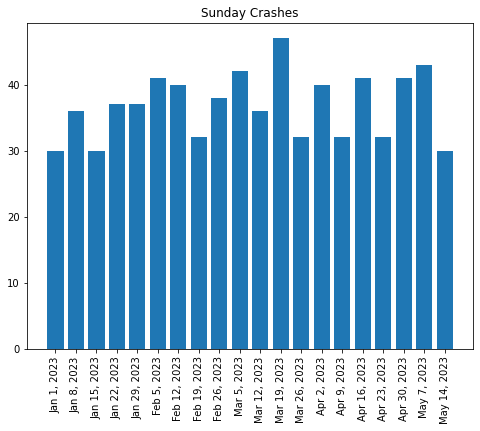

In [4]:
fig, ax = plt.subplots(figsize=(8,6))

data_to_plot = sunday_crashes.tail(20)

ax.bar(
    x=data_to_plot.crash_date_str
    , height=data_to_plot.num_crashes
    , color=TABLEAU_COLORS['tab:blue']
)

ax.tick_params(axis='x', rotation=90)

_ = plt.title('Sunday Crashes')

In [5]:
viva_sundays = [
    datetime(2023, 5, 14)
    , datetime(2023, 6, 4)
    , datetime(2023, 7, 9)
    , datetime(2023, 8, 6)
]